Question 1: Linear Regression — Predicting House Prices
Dataset: House Prices - Advanced Regression Techniques | Kaggle

Objective: Build a Linear Regression model from scratch and compare its performancewith a prebuilt model from sklearn.

1. Preprocess the Data
* Download and load train.csv.
* Use the feature OverallQual to predict the target SalePrice.
* Split the dataset into training and test sets (80% train, 20% test) to evaluate
model performance using MSE.

2. Train Linear Regression from Scratch
* Implement a function that calculates the slope and intercept using the least
squares formula.
* Train this model using the train set.

3. Test Your Custom Model
* Use the same feature (OverallQual) from the test set to make predictions.
* Calculate the Mean Squared Error (MSE) on the test predictions.

4. Train and Test Sklearn’s Linear Regression Model
* Use sklearn.linear_model.LinearRegression to train a model on the train set
using the same feature.

* Predict on the test set and compute the MSE for this model as well.
5. Create the Following Plots
* Plot 1 (Train Comparison): Plot the custom model vs sklearn model predictions
on train set.
* Plot 2 (Test Comparison): Plot the custom model vs sklearn model predictions
on test set.
* In each plot, include both, the data points and the fitted lines. Add clear titles,
axis labels and legends.

Note: Use only train.csv for training/testing split; ignore Kaggle’s test.csv in this
assignment.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

[45411.99877916] [-96469.57131874]
2630182608.9486394
2630182608.9486394


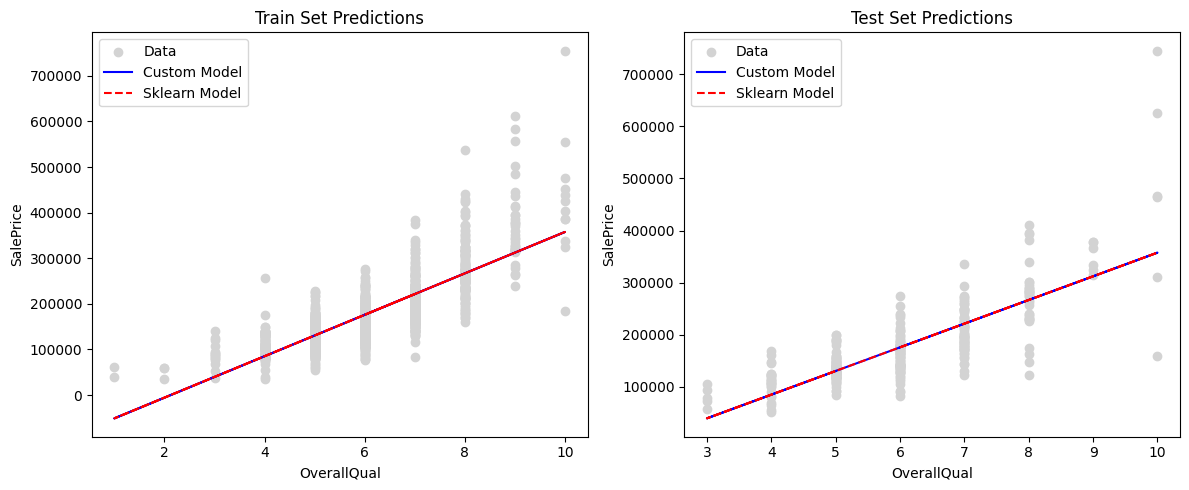

Custom Model MSE: 2630182608.9486394
Sklearn Model MSE: 2630182608.9486394


In [11]:
#part 1 processing data
df=pd.read_csv('train.csv')
df['OverallQual'].dropna(inplace=True)
df['SalePrice'].dropna(inplace=True)
x=df['OverallQual'].values.reshape(-1,1)
y=df['SalePrice'].values.reshape(-1,1)
seed_value=22 #iterations of randomising
np.random.seed(seed_value)
test_set=int(0.2*len(x))# first 80% of the data into training data and 20% of the data in test
x_train=x[:-test_set]
y_train=y[:-test_set]
x_test=x[-test_set:]
y_test=y[-test_set:]



#part 2 Train linear regression from scratch
def linear_regression(x,y):
  x_mean=np.mean(x)
  y_mean=np.mean(y)
  numerator=0
  denominator=0
  for i in range(len(x)):
    numerator+=(x[i]-x_mean)*(y[i]-y_mean)
    denominator+=(x[i]-x_mean)**2
  slope=numerator/denominator
  intercept=y_mean-(slope*x_mean)
  return slope,intercept
def linear_regression_predict(x,slope,intercept):
  return slope*x+intercept
slope,intercept=linear_regression(x_train,y_train)
print(slope,intercept)


#part 3 use test set to predict values
y_pred=linear_regression_predict(x_test,slope,intercept)
y_pred_train = linear_regression_predict(x_train.flatten(), slope, intercept)
mse=mean_squared_error(y_test,y_pred)
print(mse)


#using sklearn model
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_train_sklearn = lr.predict(x_train)
y_pred_test_sklearn = lr.predict(x_test)
mse_sklearn = mean_squared_error(y_test, y_pred_test_sklearn)
print(mse_sklearn)

#plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color='lightgray', label="Data")
plt.plot(x_train, y_pred_train, color='blue', label="Custom Model")
plt.plot(x_train, y_pred_train_sklearn, color='red', linestyle='--', label="Sklearn Model")
plt.title("Train Set Predictions")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, color='lightgray', label="Data")
plt.plot(x_test, y_pred, color='blue', label="Custom Model")
plt.plot(x_test, y_pred_test_sklearn, color='red', linestyle='--', label="Sklearn Model")
plt.title("Test Set Predictions")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.legend()

plt.tight_layout()
plt.show()

print("Custom Model MSE:", mse)
print("Sklearn Model MSE:", mse_sklearn)


Question 2: Logistic Regression — Predicting Student Pass/Fail Outcome

Dataset: Students Performance in Exams

Objective: Build a Logistic Regression model from scratch and compare its
performance with a prebuilt model from sklearn.

1. Preprocess the Data
* Download and load StudentsPerformance.csv (from the Kaggle dataset).
* Create a new column PassedMath (1 if math score ≥ 50 and 0 otherwise)
* Use "reading score" as the only feature to predict, PassedMath.
* Split the dataset into training and test sets (80% train, 20% test).
2. Train Logistic Regression from Scratch
* Implement logistic regression using the sigmoid function and gradient descent
(for 1000 iterations, with a learning rate of 0.01).
* Train the model on the training data.
3. Test Your Custom Model
* Use your model to predict outcomes on the test set.
* If a predicted probability is ≥ 0.5, classify it as 1; otherwise, classify as 0.
* Calculate accuracy of your model and create a confusion matrix (you may use
sklearn.metrics.confusion_matrix for visualization).
4. Train and Test Sklearn’s LogisticRegression Model
* Use sklearn.linear_model.LogisticRegression to train a model using the same
feature.
* Predict on the test set using the sklearn model, calculate accuracy, and plot the
confusion matrix.
5. Additional Model Evaluation
* Calculate and compare accuracy, precision, recall, and F1-score for both your
custom logistic regression model and sklearn’s model on the test set

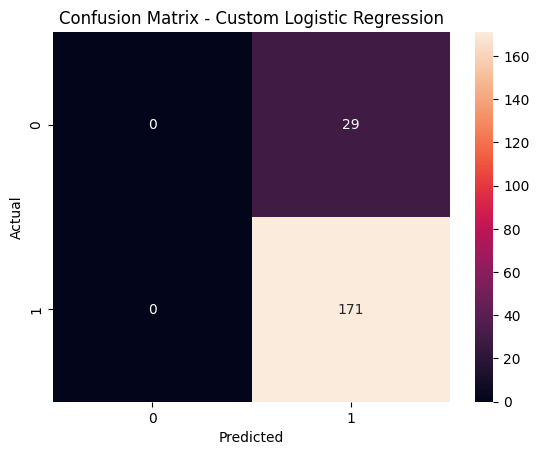

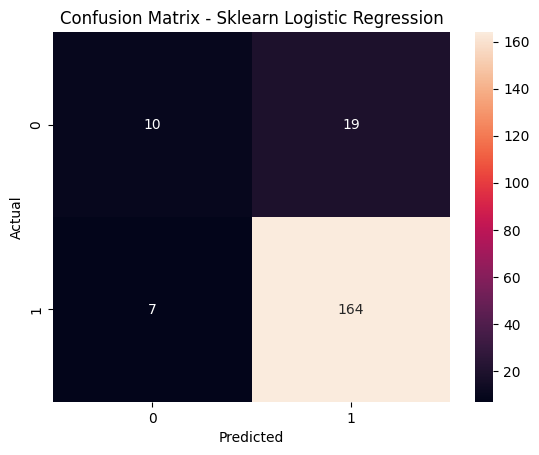

Custom Logistic Regression
Accuracy: 0.855
Precision: 0.855
Recall: 1.0
F1 Score: 0.921832884097035

Sklearn Logistic Regression
Accuracy: 0.87
Precision: 0.8961748633879781
Recall: 0.9590643274853801
F1 Score: 0.9265536723163842


In [14]:
# preprocess data
df=pd.read_csv('/content/studentsperformance.csv')
df['PassedMath'] = df['math score'].apply(lambda x: 1 if x >= 50 else 0)
X = df[["reading score"]].values
y = df["PassedMath"].values
np.random.seed(22)
test_set = int(0.2 * len(X))
X_train = X[:-test_set]
y_train = y[:-test_set]
X_test = X[-test_set:]
y_test = y[-test_set:]


#train logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_fit(X, y, lr=0.01, iterations=1000):
    x_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.zeros(x_b.shape[1])
    for _ in range(iterations):
        z = x_b.dot(theta)
        h = sigmoid(z)
        gradient = x_b.T.dot(h - y) / y.size
        theta -= lr * gradient
    return theta

def logistic_regression_predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return sigmoid(X_b.dot(theta))

theta = logistic_regression_fit(X_train, y_train)
y_probs_custom = logistic_regression_predict(X_test, theta)
y_pred_custom = (y_probs_custom >= 0.5).astype(int)

# Metrics
acc_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
f1_custom = f1_score(y_test, y_pred_custom)

# Confusion Matrix
cm_custom = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm_custom, annot=True, fmt='d')
plt.title("Confusion Matrix - Custom Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Sklearn Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_sklearn = logreg.predict(X_test)

acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
sns.heatmap(cm_sklearn, annot=True, fmt='d')
plt.title("Confusion Matrix - Sklearn Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Metrics
print("Custom Logistic Regression")
print("Accuracy:", acc_custom)
print("Precision:", precision_custom)
print("Recall:", recall_custom)
print("F1 Score:", f1_custom)

print("\nSklearn Logistic Regression")
print("Accuracy:", acc_sklearn)
print("Precision:", precision_sklearn)
print("Recall:", recall_sklearn)
print("F1 Score:", f1_sklearn)